In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/train_outlier_drop2.csv', index_col = 0)
df_test = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/test.csv')
df_train.head()
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
df_train.shape

(50503, 23)

In [ ]:
df_train.head(20)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,809.98,31.377862,268.0,0,49.574949,199.458074,5,223.451310,0
5,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,...,1,809.98,27.262259,270.0,0,49.574949,62.430172,1,340.479212,0
6,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,22.537593,271.0,0,49.574949,178.344067,5,244.565317,0
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,23.933795,270.0,0,49.574949,24.785217,1,358.124168,2
8,1,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,24.464031,319.0,0,18.816215,104.291825,5,470.690627,2
9,2,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,...,1,605.03,38.550848,320.0,0,18.816215,40.391238,0,484.591214,0
11,4,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,39.182656,322.0,0,18.816215,99.306228,4,465.676224,0
12,5,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,34.977895,323.0,0,18.816215,130.115420,5,444.867032,0
13,6,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,33.381010,324.0,0,18.816215,43.477190,0,481.505262,0
14,7,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,31.131702,325.0,0,18.816215,70.101774,1,464.880678,0


## 데이터 할당

In [ ]:
#Spli Input & Output Data
X = df_train.drop('Credit_Score',axis=1)
y = df_train['Credit_Score']
print(X.shape)
print(y.shape)

(50503, 22)
(50503,)


# model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

# RF

#### 데이터 분할

In [ ]:
# Split Data 8:2
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(40402, 22)
(10101, 22)
(40402,)
(10101,)


#### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 5)
print("5-fold : ", scores['test_score'])

5-fold :  [0.79680733 0.78975374 0.80185644 0.80222772 0.79529703]


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.7971884514586838


#### 성능평가

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# best_model
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_val_pred[:5])
print(y_val.values[:5])

[2 2 2 2 0]
[2 2 2 2 0]
[1 2 2 2 2]
[1 2 2 2 2]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7445
           1       1.00      1.00      1.00     10597
           2       1.00      1.00      1.00     22360

    accuracy                           1.00     40402
   macro avg       1.00      1.00      1.00     40402
weighted avg       1.00      1.00      1.00     40402

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1861
           1       0.79      0.79      0.79      2650
           2       0.83      0.82      0.82      5590

    accuracy                           0.80     10101
   macro avg       0.78      0.79      0.79     10101
weighted avg       0.80      0.80      0.80     10101



# Extra Tree

#### 데이터 분할

In [ ]:
# Split Data 8:2
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(40402, 22)
(10101, 22)
(40402,)
(10101,)


#### 모델 훈련 & 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 5)
print("5-fold : ", scores['test_score'])

5-fold :  [0.80237594 0.79742606 0.8095297  0.80891089 0.80470297]


In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.804589113811765


#### 성능평가

In [ ]:
et.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_train_pred = et.predict(X_train)
y_val_pred = et.predict(X_val)
print(y_train_pred[:5])
print(y_train.values[:5])
print(y_val_pred[:5])
print(y_val.values[:5])

[2 2 2 2 0]
[2 2 2 2 0]
[1 2 2 2 2]
[1 2 2 2 2]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7445
           1       1.00      1.00      1.00     10597
           2       1.00      1.00      1.00     22360

    accuracy                           1.00     40402
   macro avg       1.00      1.00      1.00     40402
weighted avg       1.00      1.00      1.00     40402

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1861
           1       0.80      0.80      0.80      2650
           2       0.83      0.84      0.83      5590

    accuracy                           0.81     10101
   macro avg       0.80      0.79      0.80     10101
weighted avg       0.81      0.81      0.81     10101



### 베스트 모델 변수중요도 확인

Text(0.5, 1.0, 'Top feature importance')

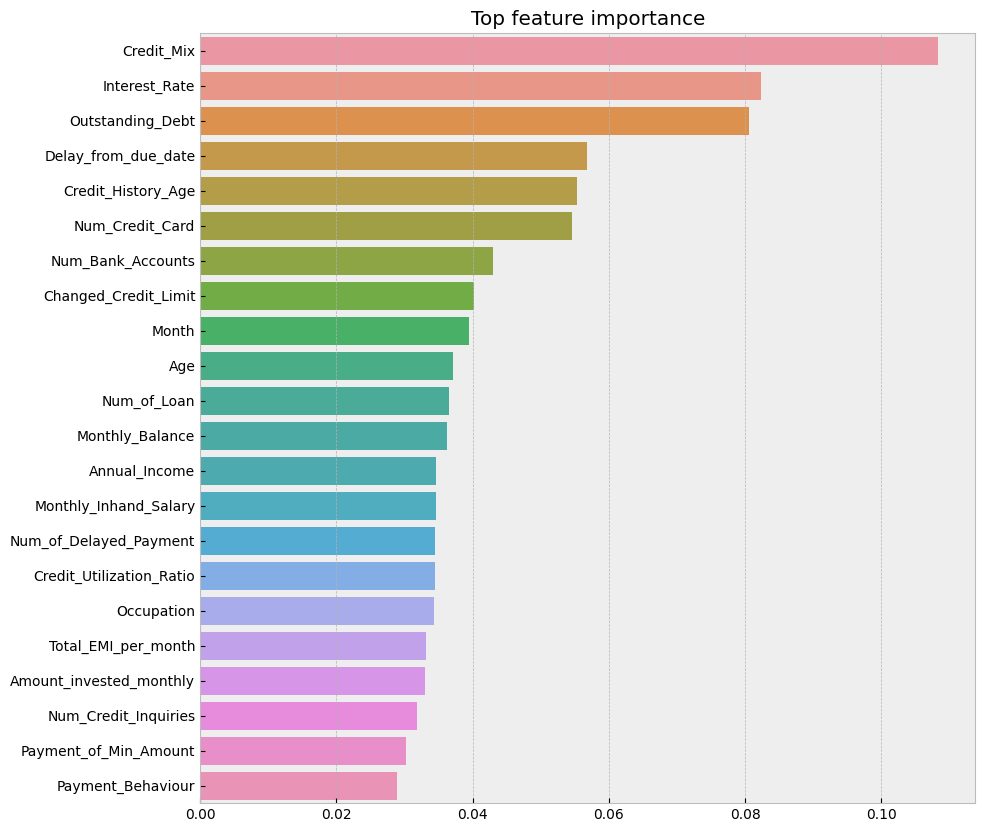

In [ ]:
# 변수 중요도
f_imp_v = et.feature_importances_
f_imp_v = pd.Series(f_imp_v, index = X.columns)
f_imp_v.sort_values(ascending=False)

# 시각화
f_top = f_imp_v.sort_values(ascending=False)
plt.figure(figsize = (10, 10))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')

# optuna

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")

# model
from sklearn.ensemble import ExtraTreesClassifier
import optuna

# misc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
def et(X_train, y_train,
        X_val, y_val):

  # instantiate model
  et = ExtraTreesClassifier(n_jobs = -1, random_state=42)

  et.fit(X_train, y_train) # train on train data
  et_score = round(et.score(X_val, y_val), 5) # validate on validation data

  print('ExtraTreesClassifier score: ', et_score)

  return et_score

In [ ]:
et_score = et(X_train, y_train, X_val, y_val)

ExtraTreesClassifier score:  0.80942


In [ ]:
def objective(trial):

    ### define params grid to search maximum accuracy
    n_estimators = trial.suggest_int('n_estimators', 50, 120)
    max_depth = trial.suggest_int('max_depth',100,1000)  # 확인 후 올리기
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 15000)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    ### modeling with suggested params
    model = ExtraTreesClassifier(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_leaf_nodes = max_leaf_nodes,
                                 criterion = criterion,
                                 random_state = 0) # do not tune the seed

    ### cross validation score
    # score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3)
    # etr_score = score.mean()
    ### fit
    model.fit(X_train, y_train) # train on train data
    accuracy = round(model.score(X_val, y_val), 5) # validate on validation data

    return accuracy

study = optuna.create_study(direction='maximize') # maximize accuracy
study.optimize(objective, n_trials=30)

[I 2023-08-04 09:06:56,363] A new study created in memory with name: no-name-403cb897-ff7a-4ee1-bf2d-56f218dc54c1
[I 2023-08-04 09:07:01,319] Trial 0 finished with value: 0.80705 and parameters: {'n_estimators': 87, 'max_depth': 188, 'max_leaf_nodes': 7920, 'criterion': 'gini'}. Best is trial 0 with value: 0.80705.
[I 2023-08-04 09:07:04,813] Trial 1 finished with value: 0.79547 and parameters: {'n_estimators': 53, 'max_depth': 431, 'max_leaf_nodes': 4331, 'criterion': 'gini'}. Best is trial 0 with value: 0.80705.
[I 2023-08-04 09:07:09,119] Trial 2 finished with value: 0.80606 and parameters: {'n_estimators': 67, 'max_depth': 404, 'max_leaf_nodes': 9866, 'criterion': 'entropy'}. Best is trial 0 with value: 0.80705.
[I 2023-08-04 09:07:11,503] Trial 3 finished with value: 0.71102 and parameters: {'n_estimators': 104, 'max_depth': 516, 'max_leaf_nodes': 245, 'criterion': 'gini'}. Best is trial 0 with value: 0.80705.
[I 2023-08-04 09:07:18,440] Trial 4 finished with value: 0.80794 and pa

In [ ]:
# best params
study.best_trial.params

{'n_estimators': 92,
 'max_depth': 995,
 'max_leaf_nodes': 9532,
 'criterion': 'entropy'}

In [ ]:
# best score (accuracy)
study.best_value

0.80794